#### VOCABULARY and DENOTATIONS

**Nominal Annual Rate of Interest** := A nominal annual rate of interest compounded or convertible $m$ times \
per year referes to an interest compounding period of $\frac{1}{m}$ years. Interest rate for $\frac{1}{m}$ year period = $\frac{\text{quoted nominal interest rate}}{m}$

**Annual Percentage Rate (APR)** := Another way to generally refer to a **nominal annual interest rate**.

**Standard Actuarial Notation** := The symbol $i$ is generally reserved for an annual effective rate, and the symbol $i^{(m)}$ is reserved for a nominal rate with interest compounded $m$ times per year.

The general relationship linking equivalent nominal annual interest rate $i^{(m)}$ and annual effective interest rate $i$ is: \
$1 + i = [1+\frac{i^{(m)}}{m}]^m$

---
#### INSIGHTS

* Consider a credit card which reports 29% **APR**. This is a nominal interest rate typically compounding monthly. Thus, every month an interest rate of $\frac{29}{12}=2.4167\%$ interest is accrued from unpaid balances. This means that the **annual effective rate** of interest is $1 - (1+0.024167)^{12}=33.18\%$

* Common ways to phrase compounding interest:
    1. Annual interest rate of 24% payable monthly
    2. Annual interest rate of 24% compounded monthly
    3. Annual interest rate of 24% convertible monthly
    4. Annual interest rate of 24% convertible 12 times per year

---
FUNCTIONS and GRAPHS

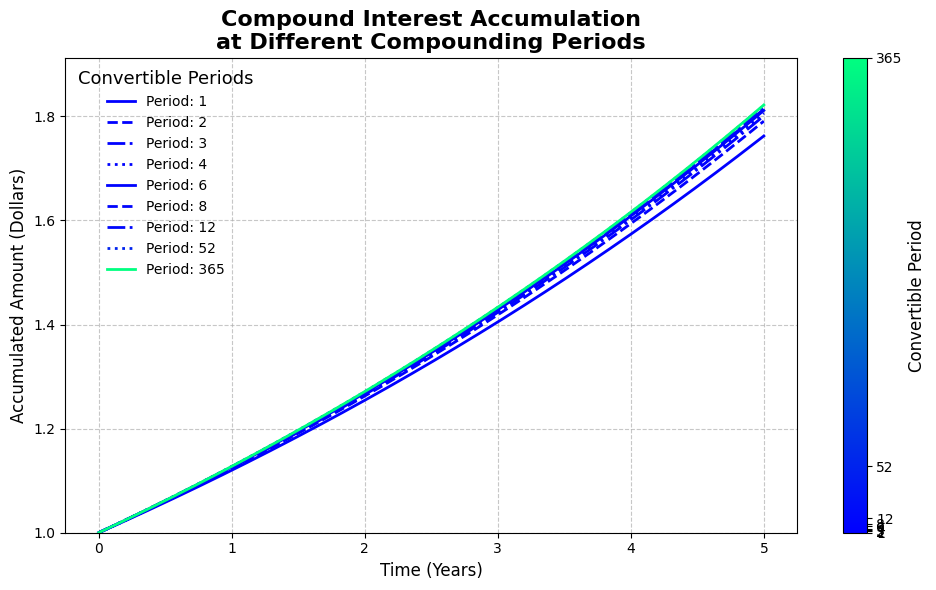

In [9]:
# ANNUAL EFFECTIVE RATES AS A FUNCTION OF CONVERTIBLE PERIODS

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Data Preparation
T = np.linspace(0, 5, 500)                    # Higher resolution for smoother curves
P = np.array([1, 2, 3, 4, 6, 8, 12, 52, 365]) # Convertible Periods
T = T[np.newaxis, :]                          # Shape for broadcasting
P = P[:, np.newaxis]                          # Shape for broadcasting
A = (1 + 0.12/P) ** (P*T)                     # Accumulated amounts given 12% rate of compounding

# Normalize the interest rates for the colormap
norm = mcolors.Normalize(vmin=P.min(), vmax=P.max())

# Choose a perceptually uniform colormap
cmap = cm.winter

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-']  # Various line styles for each period

for idx, i in enumerate(P.flatten()):
    color = cmap(norm(i))  # Map convertible period to a color
    ax.plot(T.flatten(), A[idx], color=color, linestyle=line_styles[idx % len(line_styles)],
            linewidth=2, label=f'Period: {i}')

# Customization
ax.set_xlabel('Time (Years)', fontsize=12)
ax.set_ylabel('Accumulated Amount (Dollars)', fontsize=12)
ax.set_title('Compound Interest Accumulation\nat Different Compounding Periods', fontsize=16, fontweight='bold')

# Set y-axis limits to zoom in on the curves
ax.set_ylim(1, np.max(A) * 1.05)  # Start just above 1 to highlight differences

# Create a colorbar as a legend for interest rates
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, ticks=P.flatten())
cbar.set_label('Convertible Period', fontsize=12)

# Add a legend
ax.legend(title="Convertible Periods", fontsize=10, loc='upper left', title_fontsize='13', frameon=False)

# Final adjustments
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)  # Add a light grid for clarity
plt.show()
